# Supervised Learning 



-> Supervised learing are of two type 

--> Linear Regression  (Target is of continous type)

--> Clasification      (Target is of discrete type)

# Linear Regression

Name of Algorithems
------------------

Uni variant LR Model

Bi variant LR Model

Multi variant LR Model

Simple Uni Variant LR Model
-----

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading data from CSV file 

In [2]:
data = pd.read_csv(r'C:\Users\VIVEK\OneDrive\Desktop\AI-ML\CSV files\auto_insurance_payment.csv')
data.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


Checking the correlation value

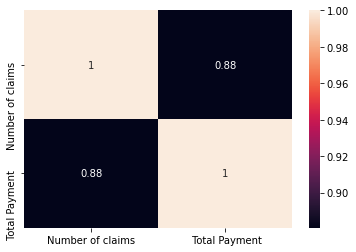

In [3]:
sns.heatmap(data.corr(),annot=True)

Scatter plot

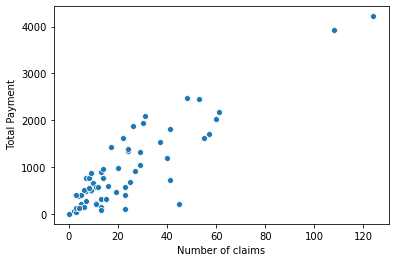

In [4]:
sns.scatterplot(data=data,x=data['Number of claims'],y=data[' Total Payment'])

Checking for Null values

In [5]:
data.isna().sum()

Number of claims    0
 Total Payment      0
dtype: int64

input and output variables

In [6]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

Now spliting the data into train and test

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

Checking the shape of the train and test 

In [8]:
xtrain.shape

(50, 1)

In [9]:
xtest.shape

(13, 1)

In [10]:
ytrain.shape

(50, 1)

In [11]:
ytest.shape

(13, 1)

Importing Linear Regression from sklearn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linReg = LinearRegression()

Now feeding the model with the input and output

In [14]:
linReg.fit(xtrain,ytrain)

LinearRegression()

Now predicting the outputs for test dataset

In [15]:
ypred = linReg.predict(xtest)
ypred.shape

(13, 1)

Plotting the original data and the model provided data

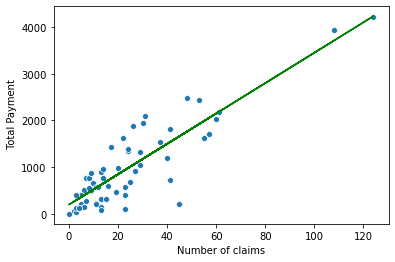

In [18]:
sns.scatterplot(data['Number of claims'],data[' Total Payment'])
plt.plot(data['Number of claims'],linReg.predict(x),color='green')
plt.show()

Checking some of the statistical values

In [17]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print('\n The mean square error is :',mean_squared_error(ytest,ypred))
print('\n The coefficient of deterministic is :',r2_score(ytest,ypred))
print('\n The explained variance score is :',explained_variance_score(ytest,ypred))


 The mean square error is : 93066.5573845344

 The coefficient of deterministic is : 0.8392198322929608

 The explained variance score is : 0.856825831925211


As the R square score is 83.92%. Now,we go toward polynomial linear regression to check 
--
weather the R square score get increased or not
--

From the above we can use the xtrain,xtest,ytrain,ytest values...

In [21]:
from scipy.stats import skew
print(data['Number of claims'].skew())
print(data[' Total Payment'].skew())

2.3162396484696197
1.7286921509134134


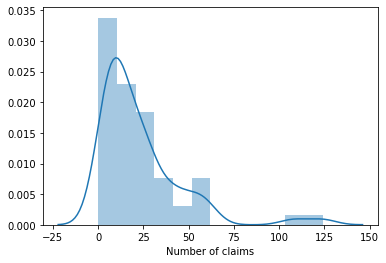

In [22]:
sns.distplot(data['Number of claims']);

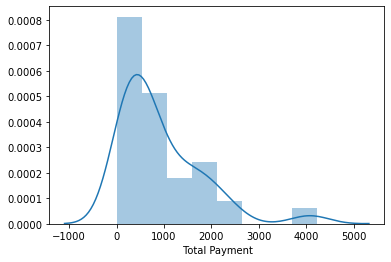

In [23]:
sns.distplot(data[' Total Payment']);

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [40]:
x_train_poly = poly.fit_transform(xtrain)
x_test_poly = poly.fit_transform(xtest)

In [41]:
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly,ytrain)

LinearRegression()

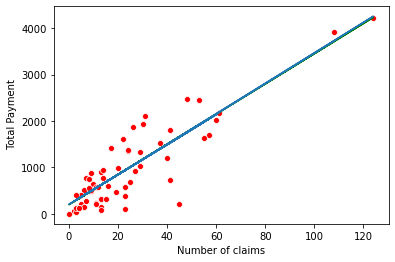

In [42]:
sns.scatterplot(data['Number of claims'],data[' Total Payment'],color='red')
plt.plot(data['Number of claims'],linReg.predict(x),color='green')
plt.plot(x,poly_reg.predict( poly.fit_transform(x)))
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print('\n The mean square error is :',mean_squared_error(ytest,poly_reg.predict(x_test_poly)))
print('\n The coefficient of deterministic is :',r2_score(ytest,poly_reg.predict(x_test_poly)))
print('\n The explained variance score is :',explained_variance_score(ytest,poly_reg.predict(x_test_poly)))


 The mean square error is : 93711.09923604756

 The coefficient of deterministic is : 0.8381063329878096

 The explained variance score is : 0.8546267133111044


There is no significat chane the r square score of the linear regression and ploynomial linear regression model.
--
So, we are going to use Linear Regression model